### **Dagger**

In [21]:
!pip install gymnasium[mujoco] --user

In [2]:
import tempfile
import numpy as np
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from imitation.algorithms import bc
from imitation.algorithms.dagger import SimpleDAggerTrainer
from imitation.util.util import make_vec_env

# Initialize a random number generator
rng = np.random.default_rng(0)

# Create the environment
env = make_vec_env("CartPole-v1", n_envs=1, rng=rng)

# Define a simple expert policy (use stable-baselines3 pre-trained model)
from stable_baselines3 import PPO

expert_model = PPO("MlpPolicy", env, verbose=0)
expert_model.learn(10_000)  # Train the expert policy

# Define a behavioral cloning trainer
bc_trainer = bc.BC(
    observation_space=env.observation_space,
    action_space=env.action_space,
    rng=rng,
)

# Create a temporary directory for DAgger
with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    print(f"Temporary directory: {tmpdir}")
    
    # Create the DAgger trainer
    dagger_trainer = SimpleDAggerTrainer(
        venv=env,
        scratch_dir=tmpdir,
        expert_policy=expert_model.policy,  # Expert policy is taken from PPO
        bc_trainer=bc_trainer,
        rng=rng,
    )
    
    # Train the DAgger model
    dagger_trainer.train(8_000)

# Evaluate the DAgger-trained policy
reward, _ = evaluate_policy(dagger_trainer.policy, env, n_eval_episodes=10)
print("Reward after DAgger training:", reward)


Temporary directory: C:\Users\Sorbonne\AppData\Local\Temp\dagger_example_zullvtdu


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000693 |
|    entropy        | 0.693     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 72.5      |
|    loss           | 0.693     |
|    neglogp        | 0.694     |
|    prob_true_act  | 0.5       |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 24        |
|    return_mean    | 16.8      |
|    return_min     | 8         |
|    return_std     | 5.74      |
---------------------------------


100batch [00:00, 156.58batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000521 |
|    entropy        | 0.521     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 80.4      |
|    loss           | 0.366     |
|    neglogp        | 0.366     |
|    prob_true_act  | 0.721     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 113       |
|    return_mean    | 72.4      |
|    return_min     | 40        |
|    return_std     | 26.1      |
---------------------------------


212batch [00:01, 154.07batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000145 |
|    entropy        | 0.145     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 93.2      |
|    loss           | 0.149     |
|    neglogp        | 0.149     |
|    prob_true_act  | 0.912     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 239       |
|    return_mean    | 169       |
|    return_min     | 107       |
|    return_std     | 43.7      |
---------------------------------


380batch [00:02, 141.83batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000172 |
|    entropy        | 0.172     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 101       |
|    loss           | 0.117     |
|    neglogp        | 0.117     |
|    prob_true_act  | 0.911     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 329       |
|    return_mean    | 255       |
|    return_min     | 181       |
|    return_std     | 57.6      |
---------------------------------


453batch [00:03, 127.70batch/s]


KeyboardInterrupt: 

KeyboardInterrupt: 

### ***Adversarial Inverse Reinforcement Learning (AIRL)**

In [5]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

# Configuration
SEED = 42
ENV_NAME = "CartPole-v1"
N_ITERATIONS = 10  # Réduit pour tester rapidement
LEARNING_RATE = 0.001

# Environnement vectorisé
env = DummyVecEnv([lambda: gym.make(ENV_NAME)])
env.seed(SEED)

# Réseau de récompense
class RewardNetwork(nn.Module):
    def __init__(self, obs_dim, action_dim):
        super(RewardNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(obs_dim + action_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    
    def forward(self, state, action):
        x = torch.cat([state, action], dim=-1)
        return self.network(x)

# Discriminateur
class Discriminator(nn.Module):
    def __init__(self, obs_dim, action_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(obs_dim + action_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, state, action):
        x = torch.cat([state, action], dim=-1)
        return self.network(x)

# Collecte des trajectoires
def collect_trajectories(model, env, n_episodes=10):
    trajectories = []
    for _ in range(n_episodes):
        obs = env.reset()
        done = False
        episode = []
        while not done:
            action, _ = model.predict(obs)
            next_obs, reward, done, info = env.step(action)
            episode.append((obs, action, reward, next_obs, done))
            obs = next_obs
        trajectories.append(episode)
    return trajectories

# Préparer les données
def prepare_data(trajectories):
    states, actions = [], []
    for episode in trajectories:
        for transition in episode:
            state, action, _, _, _ = transition
            states.append(torch.tensor(state, dtype=torch.float32))
            actions.append(torch.tensor([action], dtype=torch.float32))
    return torch.stack(states), torch.stack(actions)

# Entraînement AIRL
obs_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

reward_net = RewardNetwork(obs_dim, 1)
discriminator = Discriminator(obs_dim, 1)
optimizer_reward = optim.Adam(reward_net.parameters(), lr=LEARNING_RATE)
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE)

# Entraîner l'expert
expert_model = PPO("MlpPolicy", env, verbose=0)
expert_model.learn(10000)
expert_trajectories = collect_trajectories(expert_model, env)

# Suivi des récompenses
reward_history = []

def compute_rewards(trajectories, reward_net):
    rewards = []
    for episode in trajectories:
        for transition in episode:
            state, action, _, _, _ = transition
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            action_tensor = torch.tensor([action], dtype=torch.float32)
            reward = reward_net(state_tensor, action_tensor).item()
            rewards.append(reward)
    return np.mean(rewards)


learner = PPO("MlpPolicy", env, verbose=0)
for iteration in range(N_ITERATIONS):
    print(f"Iteration {iteration + 1}/{N_ITERATIONS}")
    
    # Générer des trajectoires
    gen_trajectories = collect_trajectories(learner, env)
    expert_states, expert_actions = prepare_data(expert_trajectories)
    gen_states, gen_actions = prepare_data(gen_trajectories)
    
    # Entraîner le discriminateur
    expert_labels = torch.ones(len(expert_states), 1)
    gen_labels = torch.zeros(len(gen_states), 1)
    states = torch.cat([expert_states, gen_states])
    actions = torch.cat([expert_actions, gen_actions])
    labels = torch.cat([expert_labels, gen_labels])
    
    predictions = discriminator(states, actions).squeeze(-1)
    loss_discriminator = nn.BCELoss()(predictions, labels)
    optimizer_discriminator.zero_grad()
    loss_discriminator.backward()
    optimizer_discriminator.step()
    
    # Entraîner le réseau de récompenses
    for state, action in zip(states, actions):
        optimizer_reward.zero_grad()
        target = 1 if (state in expert_states) else 0
        predicted_reward = reward_net(state.unsqueeze(0), action.unsqueeze(0))
        loss_reward = nn.BCELoss()(predicted_reward, torch.tensor([target], dtype=torch.float32))
        loss_reward.backward()
        optimizer_reward.step()
    
    # Calculer les nouvelles récompenses
    mean_reward = compute_rewards(gen_trajectories, reward_net)
    reward_history.append(mean_reward)
    print(f"Iteration {iteration + 1}: Mean Reward = {mean_reward}")
    
    # Mettre à jour le générateur
    learner.learn(total_timesteps=500)

# Tracer les récompenses
plt.plot(range(1, N_ITERATIONS + 1), reward_history)
plt.xlabel("Itérations")
plt.ylabel("Récompense Moyenne")
plt.title("Évolution des Récompenses Moyennes")
plt.show()


Iteration 1/10


ValueError: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1, 1])) is deprecated. Please ensure they have the same size.

In [4]:
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.ppo import MlpPolicy

from imitation.algorithms.adversarial.airl import AIRL
from imitation.data import rollout
from imitation.data.wrappers import RolloutInfoWrapper
from imitation.policies.serialize import load_policy
from imitation.rewards.reward_nets import BasicShapedRewardNet
from imitation.util.networks import RunningNorm
from imitation.util.util import make_vec_env

SEED = 42

env = make_vec_env(
    "seals:seals/CartPole-v0",
    rng=np.random.default_rng(SEED),
    n_envs=8,
    post_wrappers=[lambda env, _: RolloutInfoWrapper(env)],  # to compute rollouts
)
expert = load_policy(
    "ppo-huggingface",
    organization="HumanCompatibleAI",
    env_name="seals-CartPole-v0",
    venv=env,
)
rollouts = rollout.rollout(
    expert,
    env,
    rollout.make_sample_until(min_episodes=60),
    rng=np.random.default_rng(SEED),
)

learner = PPO(
    env=env,
    policy=MlpPolicy,
    batch_size=64,
    ent_coef=0.0,
    learning_rate=0.0005,
    gamma=0.95,
    clip_range=0.1,
    vf_coef=0.1,
    n_epochs=5,
    seed=SEED,
)
reward_net = BasicShapedRewardNet(
    observation_space=env.observation_space,
    action_space=env.action_space,
    normalize_input_layer=RunningNorm,
)
airl_trainer = AIRL(
    demonstrations=rollouts,
    demo_batch_size=2048,
    gen_replay_buffer_capacity=512,
    n_disc_updates_per_round=16,
    venv=env,
    gen_algo=learner,
    reward_net=reward_net,
)

env.seed(SEED)
learner_rewards_before_training, _ = evaluate_policy(
    learner, env, 100, return_episode_rewards=True,
)
airl_trainer.train(20000)  # Train for 2_000_000 steps to match expert.
env.seed(SEED)
learner_rewards_after_training, _ = evaluate_policy(
    learner, env, 100, return_episode_rewards=True,
)

print("mean reward after training:", np.mean(learner_rewards_after_training))
print("mean reward before training:", np.mean(learner_rewards_before_training))

c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
round:   0%|          | 0/1 [00:00<?, ?it/s]

------------------------------------------
| raw/                        |          |
|    gen/rollout/ep_len_mean  | 500      |
|    gen/rollout/ep_rew_mean  | 33.1     |
|    gen/time/fps             | 3424     |
|    gen/time/iterations      | 1        |
|    gen/time/time_elapsed    | 4        |
|    gen/time/total_timesteps | 16384    |
------------------------------------------
--------------------------------------------------
| raw/                                |          |
|    disc/disc_acc                    | 0.581    |
|    disc/disc_acc_expert             | 1        |
|    disc/disc_acc_gen                | 0.162    |
|    disc/disc_entropy                | 0.664    |
|    disc/disc_loss                   | 0.676    |
|    disc/disc_proportion_expert_pred | 0.919    |
|    disc/disc_proportion_expert_true | 0.5      |
|    disc/global_step                 | 1        |
|    disc/n_expert                    | 2.05e+03 |
|    disc/n_generated                 | 2.05e+03 |
-

round: 100%|██████████| 1/1 [00:11<00:00, 11.01s/it]


mean reward after training: 8.22
mean reward before training: 102.6


c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that will search the reminding wrappers.
  logger.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that will search the reminding wrappers.
  logger.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that w

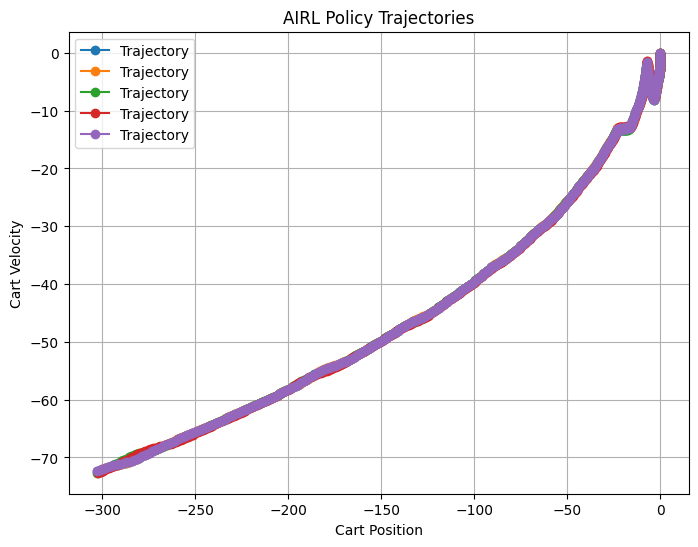

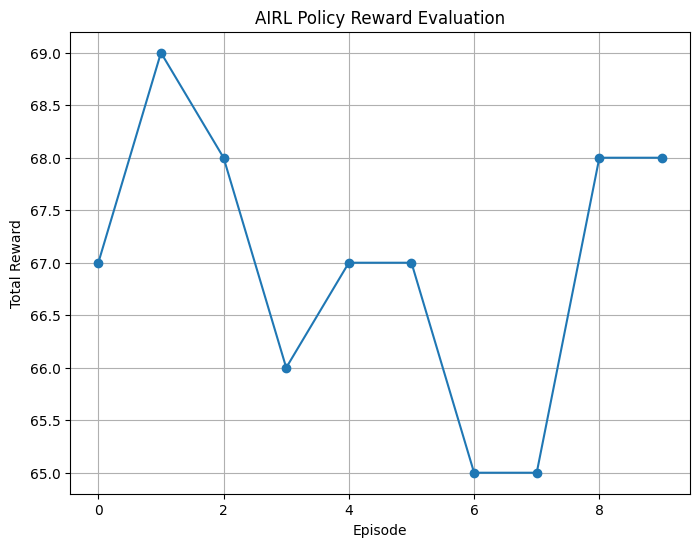

Average Reward: 67.00


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize AIRL policy performance over multiple episodes
def plot_airl_policy_trajectories(policy, env, title="AIRL Policy Trajectories", num_episodes=5):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = [False] * env.num_envs  # Initialize as list of "False" for vectorized environments
        trajectory = []
        while not np.any(done):  # Continue until at least one environment is done
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Append the current position (Cart Position, Cart Velocity)
            env_state = env.envs[0].state if hasattr(env.envs[0], "state") else None
            if env_state is not None:
                trajectory.append(env_state)
            
            # Step the environment
            obs, _, done, _ = env.step(action)
        trajectories.append(trajectory)

    # Plot the trajectories
    plt.figure(figsize=(8, 6))
    for trajectory in trajectories:
        if trajectory:  # Ensure the trajectory is not empty
            trajectory = np.array(trajectory)
            plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label="Trajectory")
    plt.title(title)
    plt.xlabel("Cart Position")
    plt.ylabel("Cart Velocity")
    plt.legend()
    plt.grid()
    plt.show()

# Function to evaluate and plot rewards achieved by the AIRL-trained policy
def plot_airl_rewards(policy, env, title="AIRL Reward Evaluation", num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = [False] * env.num_envs  # Initialize as list of "False" for vectorized environments
        episode_reward = 0
        while not np.any(done):  # Continue until at least one environment is done
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Step the environment and accumulate reward
            obs, reward, done, _ = env.step(action)
            episode_reward += np.sum(reward)  # Sum rewards across all environments
        rewards.append(episode_reward)

    # Plot rewards
    plt.figure(figsize=(8, 6))
    plt.plot(rewards, marker='o')
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()
    print(f"Average Reward: {np.mean(rewards):.2f}")

# Plot AIRL policy trajectories
plot_airl_policy_trajectories(airl_trainer.gen_algo.policy, env, title="AIRL Policy Trajectories")

# Plot rewards achieved by the AIRL-trained policy
plot_airl_rewards(airl_trainer.gen_algo.policy, env, title="AIRL Policy Reward Evaluation")
